# Preprocessing Data (NO2 Sidoarjo)

Pada khasus ini data di processing dengan 2 cara menangani data **missing value** dan membuat data menjadi **supervised**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## 1.1 Menangani Missing Value
Untuk menjaga kontinuitas data deret waktu (time series) dan memastikan model prediksi dapat belajar dengan baik dari pola historis, nilai NO₂ yang hilang akan ditangani menggunakan metode interpolasi.

Metode interpolasi linier (```linear interpolation```) dipilih karena:
- Dapat memperkirakan nilai hilang berdasarkan tren perubahan sebelum dan sesudah tanggal yang kosong.
- Cocok untuk data lingkungan yang memiliki perubahan relatif halus dari hari ke hari.
- Tidak mengubah struktur temporal dataset, sehingga tetap menjaga urutan kronologis data.

### Contoh Data

In [2]:
new_df = pd.read_csv('data-copernicus/timeseries.csv')
new_df = new_df.sort_values(by='date').reset_index(drop=True)
new_df['date'] = pd.to_datetime(new_df['date']).dt.date
new_df

,date,feature_index,NO2
0,2022-09-30,0,NaN
1,2022-10-01,0,NaN
2,2022-10-02,0,0.000048
3,2022-10-03,0,0.000040
4,2022-10-04,0,NaN
...,...,...,...
1092,2025-09-26,0,0.000030
1093,2025-09-27,0,0.000036
1094,2025-09-28,0,0.000015
1095,2025-09-29,0,0.000031


C:\Users\Harseven\AppData\Local\Temp\ipykernel_3116\1178675646.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",


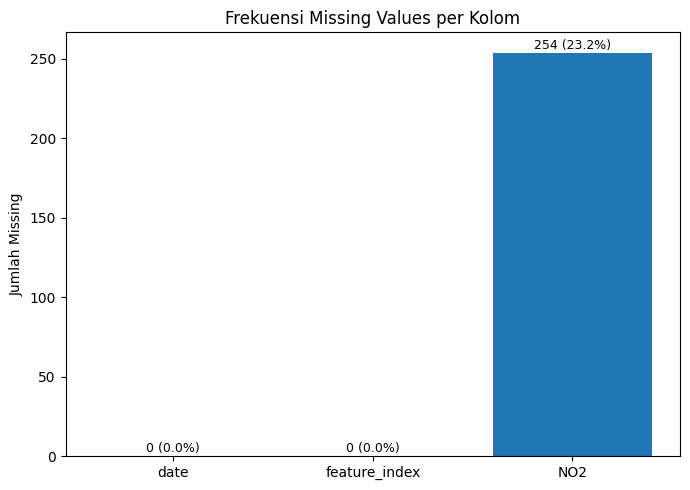

,Missing Count,Missing Percent (%)
date,0,0.00
feature_index,0,0.00
NO2,254,23.15


In [3]:
missing_count = new_df.isnull().sum()
missing_percent = (missing_count / len(new_df)) * 100

fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(missing_count.index, missing_count)

ax.set_title("Frekuensi Missing Values per Kolom")
ax.set_ylabel("Jumlah Missing")

for i, v in enumerate(missing_count):
    ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

In [4]:
new_df = pd.Series(new_df['NO2'].values, index=new_df['date'], name='NO2')
new_df = new_df.interpolate(method='linear').bfill()
new_df = pd.DataFrame(new_df).reset_index()
new_df.to_csv("data-copernicus/timeseries_cleaned.csv")
new_df

,date,NO2
0,2022-09-30,0.000048
1,2022-10-01,0.000048
2,2022-10-02,0.000048
3,2022-10-03,0.000040
4,2022-10-04,0.000039
...,...,...
1092,2025-09-26,0.000030
1093,2025-09-27,0.000036
1094,2025-09-28,0.000015
1095,2025-09-29,0.000031


In [5]:
missing_count = new_df.isnull().sum()
missing_percent = (missing_count / len(new_df)) * 100

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

,Missing Count,Missing Percent (%)
date,0,0.0
NO2,0,0.0


Setelah dilakukan proses interpolasi linier pada kolom NO₂, hasil pemeriksaan ulang terhadap data menunjukkan bahwa seluruh nilai yang hilang telah berhasil terisi.

Dengan demikian, dataset kini bersih dari missing value dan siap digunakan untuk tahap selanjutnya, yaitu pemodelan prediksi konsentrasi NO₂ menggunakan pendekatan K-Nearest Neighbors (KNN) Regression.

## 1.2 Convert Supervised Learning
Dalam proyek ini, dilakukan proses konversi data time series menjadi bentuk supervised learning menggunakan Python. Konversi ini bertujuan agar data time series dapat digunakan untuk model prediksi berbasis machine learning seperti regresi atau neural network.

Pada dasarnya, data time series hanya berisi nilai urutan waktu, sedangkan supervised learning membutuhkan pasangan input (X) dan output (y). Oleh karena itu, proses konversi dilakukan dengan cara menggeser nilai waktu sebelumnya menjadi fitur (lag features).

Dalam kasus ini saya bereksperiment 2 - 5 hari sebelum nya menjadi fitur

### Langkah - Langkah
**Menginisialisasi day 2 - 5**

In [6]:
day2 = new_df
day3 = new_df
day4 = new_df
day5 = new_df

**Membuat data supervised menggunakan t1, t2**

In [7]:
day2 = day2.drop(columns=['date'])
n = 2

for i in range(1, n + 1):
    names = f"t{i}"
    day2[names] = day2['NO2'].shift(i)

day2 = day2.dropna().reset_index(drop=True)
day2

,NO2,t1,t2
0,0.000048,0.000048,0.000048
1,0.000040,0.000048,0.000048
2,0.000039,0.000040,0.000048
3,0.000037,0.000039,0.000040
4,0.000036,0.000037,0.000039
...,...,...,...
1090,0.000030,0.000026,0.000065
1091,0.000036,0.000030,0.000026
1092,0.000015,0.000036,0.000030
1093,0.000031,0.000015,0.000036


**Membuat data supervised menggunakan t1, t2, t3**

In [8]:
day3 = day3.drop(columns=['date'])
n = 3

for i in range(1, n + 1):
    names = f"t{i}"
    day3[names] = day3['NO2'].shift(i)

day3 = day3.dropna().reset_index(drop=True)
day3

,NO2,t1,t2,t3
0,0.000040,0.000048,0.000048,0.000048
1,0.000039,0.000040,0.000048,0.000048
2,0.000037,0.000039,0.000040,0.000048
3,0.000036,0.000037,0.000039,0.000040
4,0.000034,0.000036,0.000037,0.000039
...,...,...,...,...
1089,0.000030,0.000026,0.000065,0.000073
1090,0.000036,0.000030,0.000026,0.000065
1091,0.000015,0.000036,0.000030,0.000026
1092,0.000031,0.000015,0.000036,0.000030


**Membuat data supervised menggunakan t1, t2, t3, t4**

In [9]:
day4 = day4.drop(columns=['date'])
n = 4

for i in range(1, n + 1):
    names = f"t{i}"
    day4[names] = day4['NO2'].shift(i)

day4 = day4.dropna().reset_index(drop=True)
day4

,NO2,t1,t2,t3,t4
0,0.000039,0.000040,0.000048,0.000048,0.000048
1,0.000037,0.000039,0.000040,0.000048,0.000048
2,0.000036,0.000037,0.000039,0.000040,0.000048
3,0.000034,0.000036,0.000037,0.000039,0.000040
4,0.000036,0.000034,0.000036,0.000037,0.000039
...,...,...,...,...,...
1088,0.000030,0.000026,0.000065,0.000073,0.000029
1089,0.000036,0.000030,0.000026,0.000065,0.000073
1090,0.000015,0.000036,0.000030,0.000026,0.000065
1091,0.000031,0.000015,0.000036,0.000030,0.000026


*** embuat data supervised menggunakan t1, t2, t3, t4, t5

In [10]:
day5 = day5.drop(columns=['date'])
# new_df
n = 5

for i in range(1, n + 1):
    names = f"t{i}"
    day5[names] = day5['NO2'].shift(i)

day5 = day5.dropna().reset_index(drop=True)
day5

,NO2,t1,t2,t3,t4,t5
0,0.000037,0.000039,0.000040,0.000048,0.000048,0.000048
1,0.000036,0.000037,0.000039,0.000040,0.000048,0.000048
2,0.000034,0.000036,0.000037,0.000039,0.000040,0.000048
3,0.000036,0.000034,0.000036,0.000037,0.000039,0.000040
4,0.000055,0.000036,0.000034,0.000036,0.000037,0.000039
...,...,...,...,...,...,...
1087,0.000030,0.000026,0.000065,0.000073,0.000029,0.000031
1088,0.000036,0.000030,0.000026,0.000065,0.000073,0.000029
1089,0.000015,0.000036,0.000030,0.000026,0.000065,0.000073
1090,0.000031,0.000015,0.000036,0.000030,0.000026,0.000065
